**Decision Trees**
Introduction to Decision Tree Regression

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

In [2]:
salaries_pd = pd.read_csv('Position_Salaries.csv')
salaries_pd

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


# Specify Prediction Target and predictive features

Select the target variable, which corresponds to the salaries. Save this to a new variable called `y`.

Now you will create a DataFrame called `X` holding the predictive features.

In [3]:
# define dependent and independent variable
y=salaries_pd['Salary']
x=salaries_pd.iloc[:, 1:2].values

# Defining the model
What type of model will it be? A decision tree? Some other type of model? Some other parameters of the model type are specified too.

Many machine learning models allow some randomness in model training. Specifying a number for random_state ensures you get the same results in each run. This is considered a good practice. You use any number, and model quality won't depend meaningfully on exactly what value you choose.

In [4]:
reg = DecisionTreeRegressor(random_state = 1)

# Fitting the model
Capture patterns from provided data. This is the heart of modeling.

In [5]:
reg.fit(x,y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=1, splitter='best')

# Predicting

Make predictions with the model's `predict` command using `X` as the data.

In [6]:
print('Salaries to be predicted:')
print(y, '\n')
print('Salaries prediction:')
print(reg.predict(x))

Salaries to be predicted:
0      45000
1      50000
2      60000
3      80000
4     110000
5     150000
6     200000
7     300000
8     500000
9    1000000
Name: Salary, dtype: int64 

Salaries prediction:
[  45000.   50000.   60000.   80000.  110000.  150000.  200000.  300000.
  500000. 1000000.]


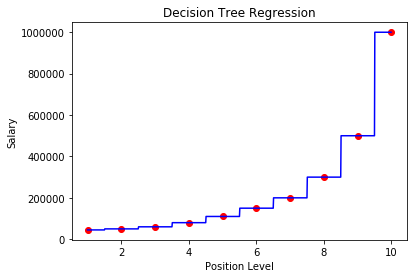

In [7]:
# vizualizing the decision tree regression results
x_grid = np.arange(min(x),max(x),0.01)
x_grid = x_grid.reshape((len(x_grid)), 1)
plt.scatter(x,y, color = 'red')
plt.plot(x_grid, reg.predict(x_grid), color = 'blue')
plt.title('Decision Tree Regression')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

# Model evaluation/validation
You'll want to evaluate almost every model you ever build. In most (though not all) applications, the relevant measure of model quality is predictive accuracy. In other words, will the model's predictions be close to what actually happens.

Many people make a huge mistake when measuring predictive accuracy. They make predictions with their training data and compare those predictions to the target values in the training data. You'll see the problem with this approach and how to solve it in a moment, but let's think about how we'd do this first.

You'd first need to summarize the model quality into an understandable way. If you compare predicted and actual home values for 10,000 houses, you'll likely find mix of good and bad predictions. Looking through a list of 10,000 predicted and actual values would be pointless. We need to summarize this into a single metric.

There are many metrics for summarizing model quality, but we'll start with one called Mean Absolute Error (also called MAE). Let's break down this metric starting with the last word, error.

The prediction error for each house is:

error=actual−predicted

So, if a house cost $150,000 and you predicted it would cost $100,000 the error is $50,000.

With the MAE metric, we take the absolute value of each error. This converts each error to a positive number. We then take the average of those absolute errors. This is our measure of model quality. In plain English, it can be said as

On average, our predictions are off by about X.

To calculate MAE, we first need a model. That is built in a hidden cell below, which you can review by clicking the code button.

In [8]:
boston_housing_df = pd.read_csv('boston_housing.csv')
boston_housing_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [9]:
# define dependent and independent variables
predictive_features = ['LotArea', 'YearBuilt', '1stFlrSF', '2ndFlrSF', 'FullBath', 'BedroomAbvGr', 'TotRmsAbvGrd']
x=boston_housing_df[predictive_features]
print(x.head())
y=boston_housing_df['SalePrice']
print(y.head())

   LotArea  YearBuilt  1stFlrSF  2ndFlrSF  FullBath  BedroomAbvGr  \
0     8450       2003       856       854         2             3   
1     9600       1976      1262         0         2             3   
2    11250       2001       920       866         2             3   
3     9550       1915       961       756         1             3   
4    14260       2000      1145      1053         2             4   

   TotRmsAbvGrd  
0             8  
1             6  
2             6  
3             7  
4             9  
0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64


In [10]:
# define the model
boston_housing_model = DecisionTreeRegressor(random_state=1)

In [11]:
# fit the model
boston_housing_model.fit(x,y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=1, splitter='best')

In [12]:
# make predictions
predicted_home_prices = boston_housing_model.predict(x)
print(y.head())
print(predicted_home_prices[:5])

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64
[208500. 181500. 223500. 140000. 250000.]


In [13]:
# calculate the mean absolute error
mean_absolute_error(y, predicted_home_prices)

62.35433789954339

# The Problem with "In-Sample" Scores

The measure we just computed can be called an "in-sample" score. We used a single "sample" of houses for both building the model and evaluating it. Here's why this is bad.

Imagine that, in the large real estate market, door color is unrelated to home price.

However, in the sample of data you used to build the model, all homes with green doors were very expensive. The model's job is to find patterns that predict home prices, so it will see this pattern, and it will always predict high prices for homes with green doors.

Since this pattern was derived from the training data, the model will appear accurate in the training data.

But if this pattern doesn't hold when the model sees new data, the model would be very inaccurate when used in practice.

Since models' practical value come from making predictions on new data, we measure performance on data that wasn't used to build the model. The most straightforward way to do this is to exclude some data from the model-building process, and then use those to test the model's accuracy on data it hasn't seen before. This data is called **validation/testing data**.

## Train Test Split
The scikit-learn library has a function train_test_split to break up the data into two pieces. 

We'll use some of that data as training data to fit the model, and we'll use the other data as validation data to calculate mean_absolute_error.

In [14]:
# split data into training and validation data, for both features and target
# The split is based on a random number generator. Supplying a numeric value to
# the random_state argument guarantees we get the same split every time we
train_X, val_X, train_y, val_y = train_test_split(x, y, random_state = 0)

In [15]:
# Define model
boston_housing_model = DecisionTreeRegressor()

In [16]:
# Fit model
boston_housing_model.fit(train_X, train_y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [17]:
# get predicted prices on validation data
val_predictions = boston_housing_model.predict(val_X)
print(mean_absolute_error(val_y, val_predictions))

33114.28493150685


Your mean absolute error for the in-sample data was about 62 dollars. Out-of-sample it is more than 33,000 dollars.

This is the difference between a model that is almost exactly right, and one that is unusable for most practical purposes. 

There are many ways to improve this model, such as experimenting to find better features or different model types.

# Overfitting and Underfitting
**Overfitting**, where a model matches the training data almost perfectly, but does poorly in validation and other new data. 

**Underfitting**, when a model fails to capture important distinctions and patterns in the data, so it performs poorly even in training data. 

Since we care about accuracy on new data, which we estimate from our validation data, we want to find the sweet spot between underfitting and overfitting. Visually, we want the low point of the (red) validation curve in

![Overfitting vs Underfitting](http://i.imgur.com/2q85n9s.png)

There are a few alternatives for controlling the tree depth, and many allow for some routes through the tree to have greater depth than other routes. But the max_leaf_nodes argument provides a very sensible way to control overfitting vs underfitting. The more leaves we allow the model to make, the more we move from the underfitting area in the above graph to the overfitting area.

We can use a utility function to help compare MAE scores from different values for max_leaf_nodes:

In [18]:
def get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y):
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0)
    model.fit(train_X, train_y)
    preds_val = model.predict(val_X)
    mae = mean_absolute_error(val_y, preds_val)
    return(mae)

In [20]:
# compare MAE with differing values of max_leaf_nodes
for max_leaf_nodes in [5, 50, 500, 5000]:
    my_mae = get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y)
    print("Max leaf nodes: %d  \t\t Mean Absolute Error:  %d" %(max_leaf_nodes, my_mae))


Max leaf nodes: 5  		 Mean Absolute Error:  35190
Max leaf nodes: 50  		 Mean Absolute Error:  27825
Max leaf nodes: 500  		 Mean Absolute Error:  32662
Max leaf nodes: 5000  		 Mean Absolute Error:  33382


Of the options listed, 50 is the optimal number of leaves.

We use validation data, which isn't used in model training, to measure a candidate model's accuracy. 

This lets us try many candidate models and keep the best one.